In [5]:
import numpy as np

In [6]:
my_lst=[1,2,3,4,5]
arr=np.array(my_lst)

In [7]:
type(arr)

numpy.ndarray

In [8]:
print(arr)

[1 2 3 4 5]


In [9]:
arr.shape

(5,)

In [10]:
my_lst1=[1,2,3,4,5]
my_lst2=[2,3,4,5,6]
my_lst3=[9,8,7,6,5]
arr=np.array([my_lst1,my_lst2,my_lst3])

In [11]:
arr

array([[1, 2, 3, 4, 5],
       [2, 3, 4, 5, 6],
       [9, 8, 7, 6, 5]])

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
df=pd.read_csv("/content/height-weight.csv")

In [14]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

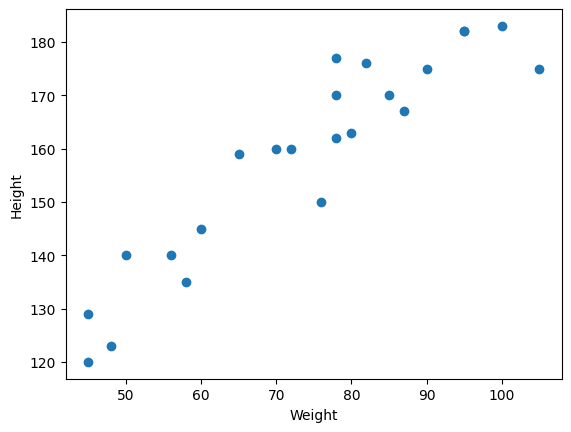

In [15]:
##scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [24]:
##Corelation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


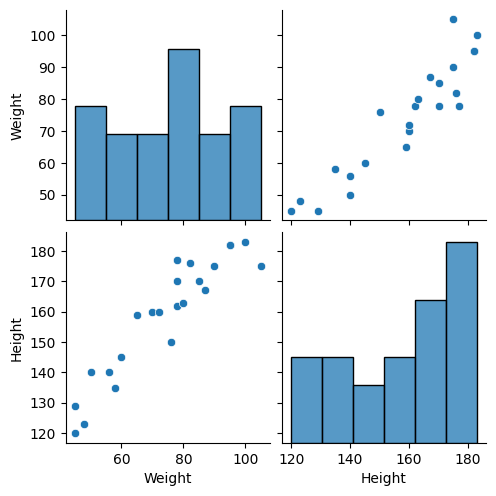

In [23]:
## Seaborn for vissualization
import seaborn as sns
sns.pairplot(df)

In [17]:
##Independent and dependent function
X=df[['Weight']] ## independent feature should be dataframe or 2 dimensional arraay
y=df['Height']

In [18]:
X=df['Weight']
y

,Height
0,120
1,135
2,123
3,145
4,160
5,162
6,163
7,175
8,182
9,170


In [19]:
## Train test Split
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)


In [21]:
## Standarddizatrion
from sklearn.preprocessing import StandardScaler


Shape of X_train_scaled: (17, 1)
Shape of X_test_scaled: (6, 1)
Coefficient or slope [17.2982057]
Intercept 156.47058823529412
114.84069295228699 9.66512588679501 10.716374991212605


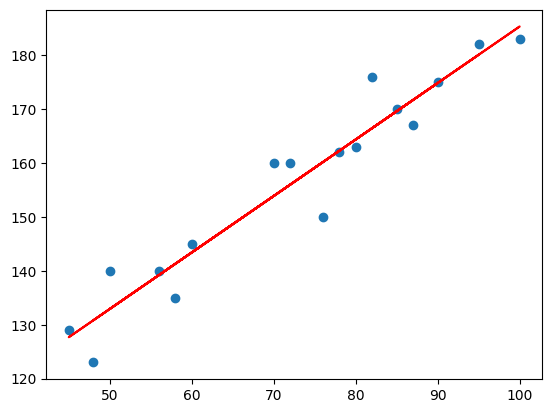

In [26]:
##Independent and dependent function
# X=df[['Weight']] ## independent feature should be dataframe or 2 dimensional arraay
# y=df['Height']

# X=df['Weight']
# y

## Train test Split
from sklearn.model_selection import train_test_split

# Correct way to select a single column as a DataFrame
X = df[['Weight']]
y = df['Height']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

## Standarddizatrion
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
# Now X_train is a DataFrame (2D) and can be fit_transformed
X_train_scaled = scaler.fit_transform(X_train)

# Also transform the test data
X_test_scaled = scaler.transform(X_test)

# Print shapes to confirm they are 2D after scaling
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)

## Apply  simple liner regression
from sklearn.linear_model import LinearRegression

regression=LinearRegression(n_jobs=-1)
# Fit the regression model using the scaled training data
regression.fit(X_train_scaled,y_train)

print('Coefficient or slope',regression.coef_)
print("Intercept",regression.intercept_)

## plot training data plot best fit line
# Plotting against the original X_train values for clarity, but predicting with scaled X_train
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train_scaled),color='red')

# Prediction of test data
## prediction for test data
# Predict using the scaled test data
y_pred=regression.predict(X_test_scaled)

## performance Metrics
from sklearn.metrics import  mean_absolute_error,mean_squared_error

mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse,mae,rmse)

In [27]:
X_test=scaler.transform(X_test)
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [28]:
## Apply  simple liner regression
from sklearn.linear_model import LinearRegression

In [29]:
regression=LinearRegression(n_jobs=-1)
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [30]:
print('Coefficient or slope',regression.coef_)
print("Intercept",regression.intercept_)

Coefficient or slope [1.04792503]
Intercept 80.52684512622542


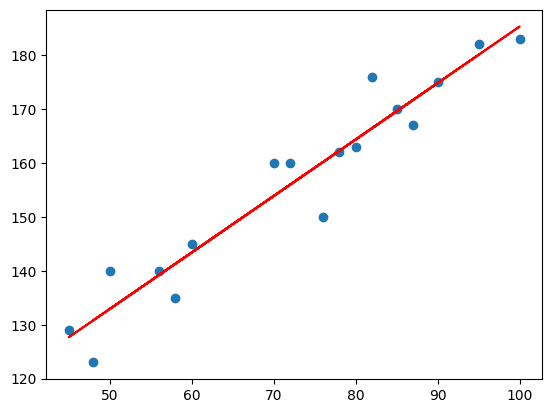

In [31]:
## plot training data plot best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train),color='red')

# **Prediction of test data**
# predicted height outputt= intercept+coef_(Weight)
# y_pred_test=80.52684512622542 + 1.04792503_(Weight)


In [32]:
## prediction for test data
y_pred=regression.predict(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [33]:
## performance Metrics
from sklearn.metrics import  mean_absolute_error,mean_squared_error


In [34]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse,mae,rmse)

7276.932884039703 82.97662409755102 85.3049405605543


R square
R^2 = 1.SSR/SST
R^2 = coefficient of determination of SSR = sum of square of residuala SST = total sum of squares

In [37]:
 from sklearn.metrics import r2_score

In [38]:
score=r2_score(y_test,y_pred)
print(score)

-15.723241865651406


Adjusted R2 = 1 -[(1-R2)*(n-1)(n-k-1)]
where
R2: The R2 of the model n:The number of observations k: The number of predictor variables

In [42]:
# display adjusted R-squared
1 -(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

-19.904052332064257

In [43]:
## OLS linear Regression
import statsmodels.api as sn

In [44]:
model=sn.OLS(y_train,X_train).fit()


In [48]:
prediction = model.predict(X_test)
print (prediction)

[ 0.70487577  0.70487577 -3.5018828   2.87199382 -0.95233215  4.14676914]


In [49]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              1133.
Date:                Fri, 06 Jun 2025   Prob (F-statistic):                    2.80e-16
Time:                        08:31:03   Log-Likelihood:                         -73.806
No. Observations:                  17   AIC:                                      149.6
Df Residuals:                      16   BIC:                                      150.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [50]:
## prediction for new data
regression.predict([[72]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([155.97744705])